In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

Імпорт даних

In [67]:
path = 'D:\\uni\\2курс\ПЗМН\ML_labs\lin_reg_task\Student_performance_data.csv'
dataset = pd.read_csv(path)
dataset.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [68]:
dataset["GPA"].value_counts()

GPA
0.000000    16
4.000000     7
2.928219     1
1.164539     1
2.054218     1
            ..
2.396788     1
1.341521     1
2.232175     1
1.384404     1
0.469553     1
Name: count, Length: 2371, dtype: int64

In [69]:
dataset.GPA = dataset.GPA.astype('int')

Перевірка даних на NaN

In [70]:
dataset.isna().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

Створення окремого DataFrame, який я використовуватиму

In [71]:
df = dataset[['ParentalEducation', 'StudyTimeWeekly', 'Absences', 'GPA']].copy()
df.index = dataset.StudentID
df.head()

,ParentalEducation,StudyTimeWeekly,Absences,GPA
StudentID,,,,
1001,2,19.833723,7,2
1002,1,15.408756,0,3
1003,3,4.210570,26,0
1004,3,10.028829,14,2
1005,2,4.672495,17,1


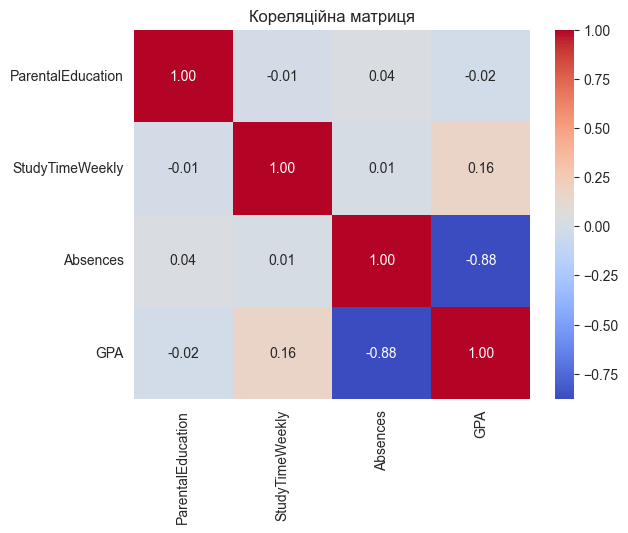

In [72]:
corr_matrix = df[['ParentalEducation', 'StudyTimeWeekly', 'Absences', 'GPA']].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Кореляційна матриця")
plt.show()

In [140]:
X = df[['StudyTimeWeekly', 'Absences']]
Y = df['GPA']

Нормалізація даних

In [141]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.78033552, -0.89082237],
       [ 0.99737625, -1.71769358],
       [-0.98404514,  1.35354235],
       ...,
       [-0.52489493,  0.64479559],
       [ 0.46794965,  0.29042222],
       [ 1.42400846, -0.18207562]])

Прогнозування оцінок за відвідуванням та годинами навчання протягом тижня за допомогою лінійної регресії

In [142]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, random_state=11)

In [143]:
X_train.shape

(1794, 2)

In [144]:
X_test.shape

(598, 2)

In [145]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

LinearRegression()

In [146]:
lin_reg.coef_

array([ 0.16792053, -0.83979809])

In [147]:
lin_reg.intercept_

np.float64(1.407454840776385)

In [148]:
predicted = lin_reg.predict(X_test)
expected = Y_test
for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 2.53, expected: 2.00
predicted: 1.97, expected: 2.00
predicted: -0.31, expected: 0.00
predicted: 0.73, expected: 1.00
predicted: 1.29, expected: 1.00
predicted: 1.30, expected: 1.00
predicted: 2.28, expected: 2.00
predicted: 1.79, expected: 2.00
predicted: 0.97, expected: 1.00
predicted: 0.77, expected: 1.00
predicted: 1.25, expected: 2.00
predicted: 1.31, expected: 2.00
predicted: 0.55, expected: 0.00
predicted: 1.64, expected: 2.00
predicted: 0.69, expected: 1.00
predicted: 1.37, expected: 1.00
predicted: 0.94, expected: 1.00
predicted: 2.16, expected: 2.00
predicted: 1.78, expected: 2.00
predicted: 1.51, expected: 1.00
predicted: -0.09, expected: 0.00
predicted: 2.08, expected: 2.00
predicted: 1.61, expected: 2.00
predicted: 0.84, expected: 1.00
predicted: 2.36, expected: 2.00
predicted: 0.77, expected: 1.00
predicted: 0.29, expected: 0.00
predicted: 1.54, expected: 2.00
predicted: 1.57, expected: 2.00
predicted: 0.55, expected: 1.00
predicted: 1.74, expected: 2.00
predic

Обчислення середньоквадратичної похибки

In [149]:
mean_squared_error(Y_test, predicted)

0.1650569472507269

Обчислення R^2

In [150]:
r2_score(Y_test, predicted)

0.8162387741017452

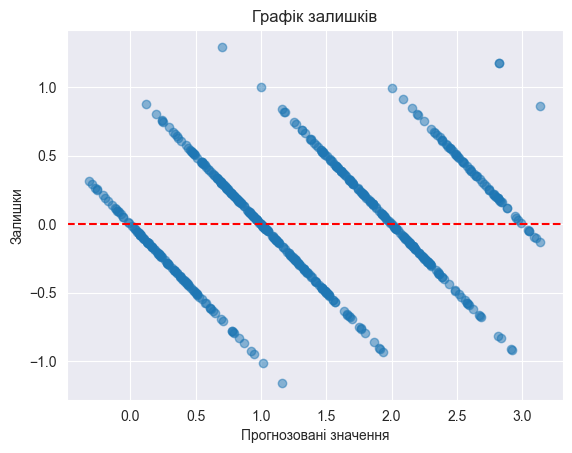

In [151]:
residuals = Y_test - predicted
plt.scatter(predicted, residuals, alpha=0.5)
plt.xlabel('Прогнозовані значення')
plt.ylabel('Залишки')
plt.title('Графік залишків')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

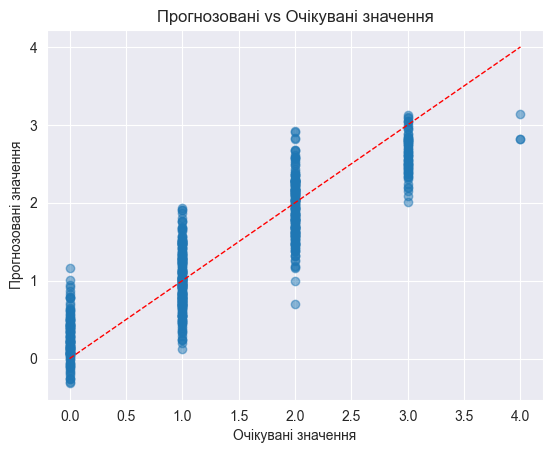

In [152]:
plt.scatter(Y_test, predicted, alpha=0.5)
plt.xlabel('Очікувані значення')
plt.ylabel('Прогнозовані значення')
plt.title('Прогнозовані vs Очікувані значення')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=1)
plt.show()

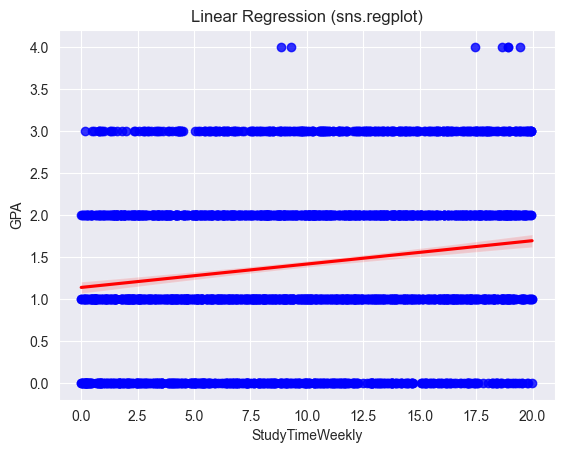

In [153]:
axes = sns.regplot(x=df.StudyTimeWeekly, y=df.GPA, data=df, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title("Linear Regression (sns.regplot)")
plt.show()

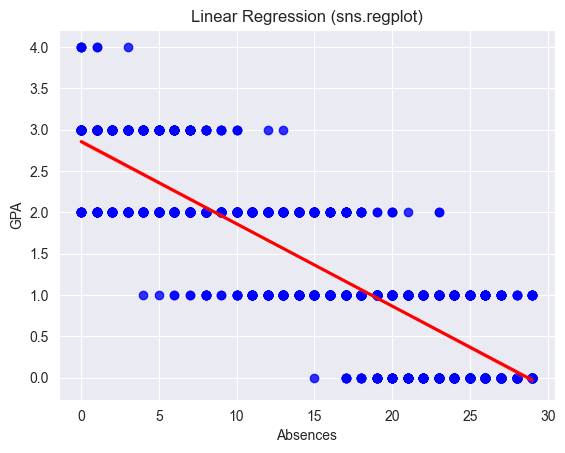

In [154]:
axes = sns.regplot(x=df.Absences, y=df.GPA, data=df, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title("Linear Regression (sns.regplot)")
plt.show()

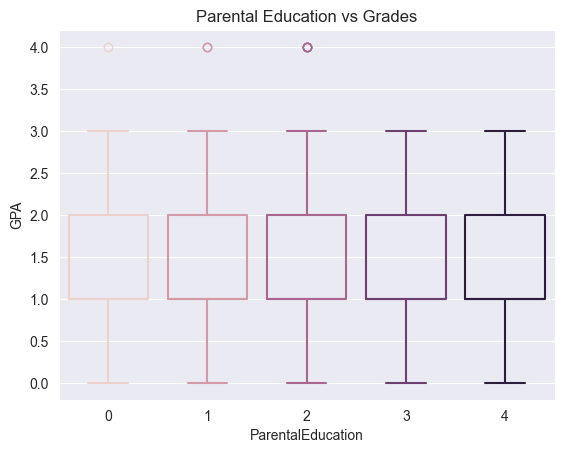

In [155]:
axes = sns.boxplot(x=df.ParentalEducation, y=df.GPA.astype("int"), data=df, hue=df.ParentalEducation, fill=False, legend=False)
plt.title("Parental Education vs Grades")
plt.show()

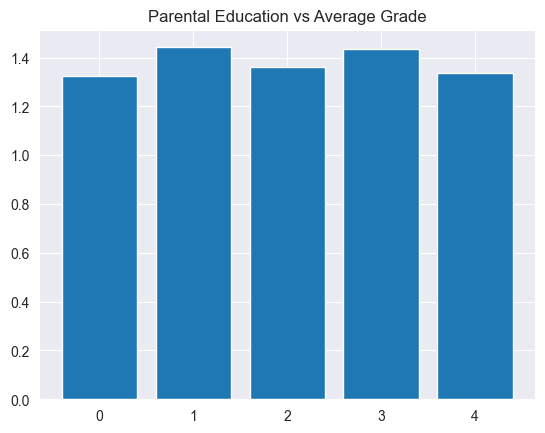

In [156]:
df.loc[:,['ParentalEducation']] = df.loc[:,['ParentalEducation']].astype('category')
grade_mean = df.groupby('ParentalEducation', observed=True)['GPA'].mean()
plt.bar(x=df['ParentalEducation'].unique(), height=grade_mean)
plt.title('Parental Education vs Average Grade')
plt.show()

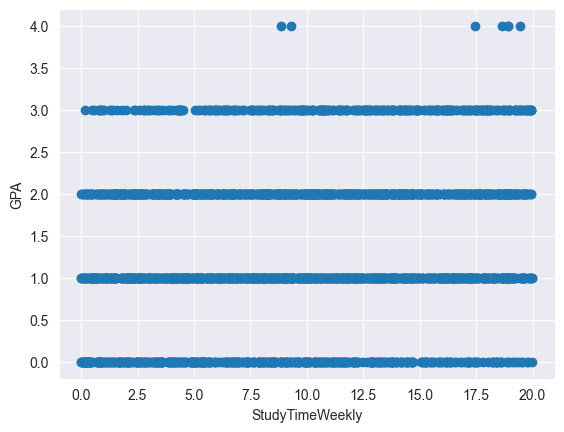

In [157]:
plt.scatter(df.StudyTimeWeekly, df.GPA)
plt.xlabel('StudyTimeWeekly')
plt.ylabel('GPA')
plt.show()

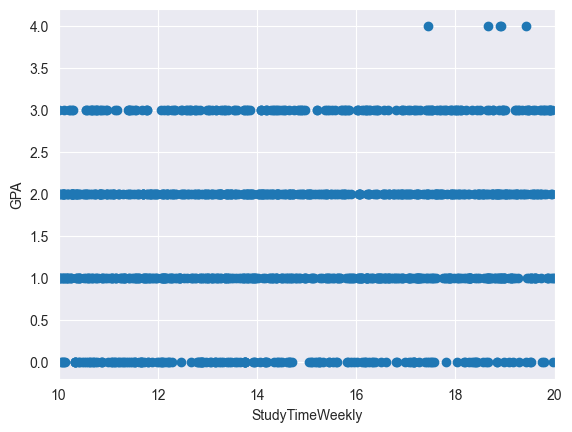

In [158]:
plt.scatter(df.StudyTimeWeekly, df.GPA)
plt.xlabel('StudyTimeWeekly')
plt.ylabel('GPA')
plt.xlim(10, 20)
plt.show()

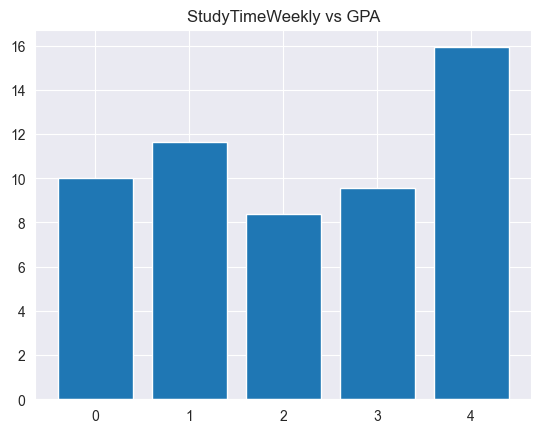

In [159]:
time_mean = df.groupby('GPA', observed=True)['StudyTimeWeekly'].mean()
plt.bar(x=df['GPA'].unique(), height=time_mean)
plt.title('StudyTimeWeekly vs GPA')
plt.show()

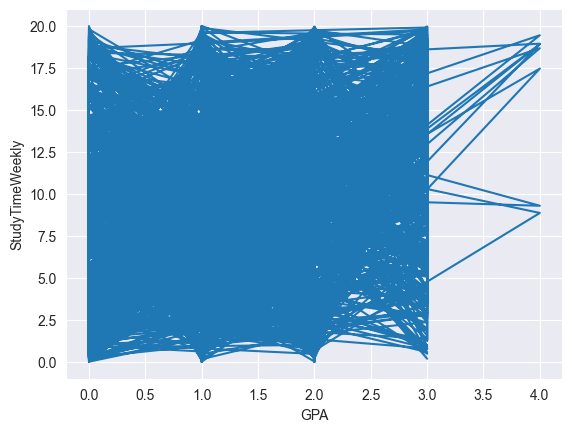

In [160]:
plt.plot(df.GPA, df.StudyTimeWeekly)
plt.xlabel('GPA')
plt.ylabel('StudyTimeWeekly')
plt.show()